<h1> Chapter - 2 </h1>
<small><ol>
    <li>Get data </li>
    <li>Exploring data -> 10% - 20%  </li>
    <li>Preparing the data ->  70%- 80%</li>
    <li>Shortlising the model -> rest of the time </li>
    <li>Finetuning the model -> rest of the time  </li>
</ol></small>

<small><h4>1. Get data</h4></small>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import os 
import plotly.express as ps
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
pwd = os.getcwd()
file_path = os.path.join(pwd, "housing.csv")
file_path

'c:\\Users\\Admin\\Videos\\work\\Portfolio\\8.Data_pipeline\\4.Data_modeling\\1.Chapter_2\\housing.csv'

<small>This above method is good to compatible with all os , windows mac etc. Better method that joining 2 strings method </small>

In [3]:
housing_data = pd.read_csv(file_path)
#housing_data.head()

<small><h4>2. Explore the Data</h4></small>

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<small>float64 = decimal numeric value , object = string, dates are genreally very difficult to understand</small>

In [5]:
housing_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<small>5 diffternt types of values. <br> Lets viz this data to understand</small>

<Axes: ylabel='ocean_proximity'>

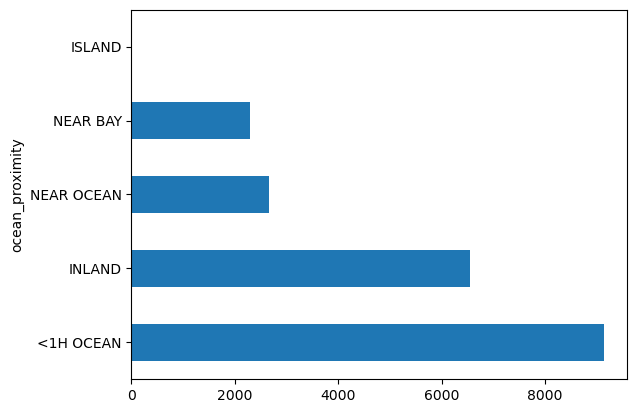

In [6]:
housing_data['ocean_proximity'].value_counts().plot(kind='barh')

<small><ol>
<li>'line': Line plot (default if not specified).</li>
<li>'bar': Vertical bar plot.</li>
<li>'barh': Horizontal bar plot.</li>
<li>'hist': Histogram.</li>
<li>'box': Box plot.</li>
<li>'scatter': Scatter plot.</li>
<li>'area': Area plot.</li>
<li>'pie': Pie chart.</li>
</ol>

<p>Story telling with data : Horizontal bar charts always better than vertival bar chart </p>
<p>There are almost no islands</p>
<p>More property close to ocean within 1 h </p>
</small>

In [7]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

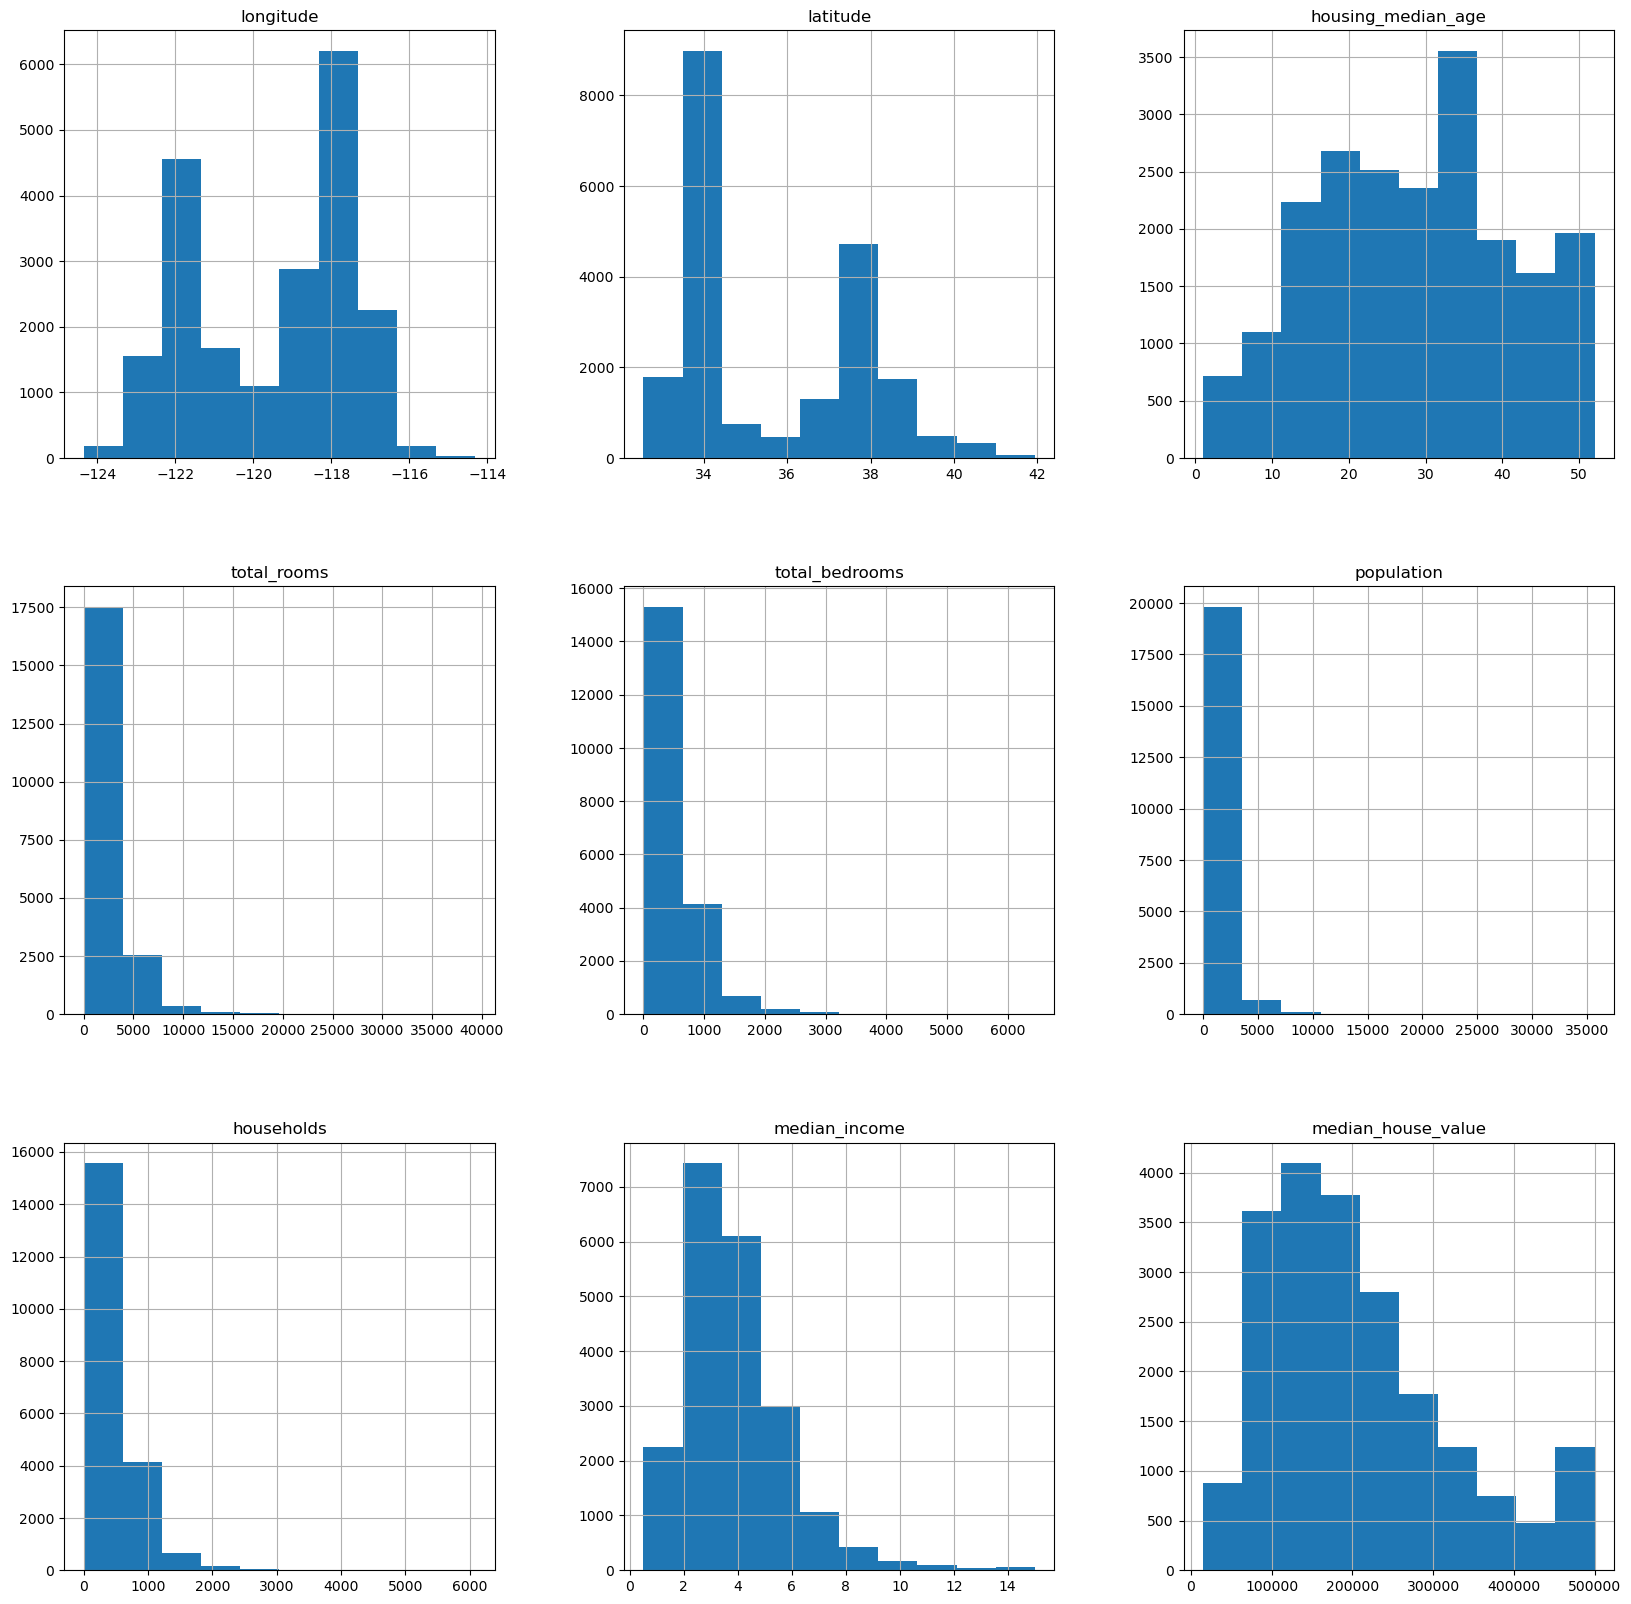

In [8]:
housing_data.hist(figsize=(20,20))

<Axes: >

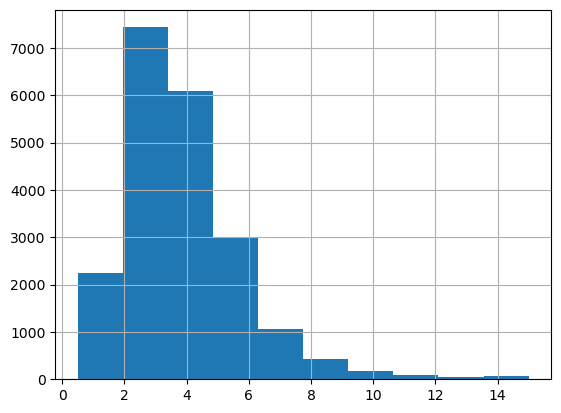

In [9]:
housing_data['median_income'].hist()

<p>Creating a copy o data to modify and keep original safe</p>

In [10]:
housing_data_copy = housing_data.copy()

<p>'median_income' - is a very important factor for a house price, so we will group them into categories.</p>
<p>pd.cut(x, bins, labels=None, right=True, include_lowest=False, ...)</p>

<p> bins=[0.,1.5,3.0,4.5,6., np.inf],
<br>#here np.inf  means to infinity</p>

In [11]:
housing_data_copy['income_category'] = pd.cut(housing_data_copy['median_income'],
                                              bins=[0., 1.5,3.0,4.5,6., np.inf], 
                                              labels=[1,2,3,4,5])
housing_data_copy['income_category'].value_counts()

income_category
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

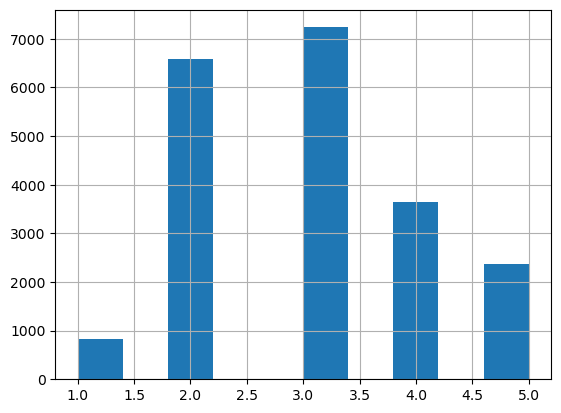

In [12]:
housing_data_copy['income_category'].hist()

<p>Most people are in midlle income category</p>

In [13]:
housing_data_copy.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_category'],
      dtype='object')

In [14]:
housing_data_copy['income_category'] = pd.cut(housing_data_copy['median_income'],
                                              bins=[0., 1.5,3.0,4.5,6., np.inf], 
                                              labels=[1,2,3,4,5])

In [15]:
y=housing_data_copy['median_house_value']
x=housing_data_copy.drop('median_house_value', axis= 1)

In [16]:
#x
#y

<p>We have seperated them into 2 data set <br>1.Here y is the to be predicted value 
<br>2. Here x is the data that will be fed into the Ml </p>

In [17]:
from sklearn.model_selection import train_test_split

<small><p>ML model looks only at training set.<br> To see the acuracy of the ML model, " you have never seen this data set look any predict the values".<br>
This is done to Avoid "over fitting".<br>
Over fitting is  ML model does not look for general pattern , and how I best optimise for the specific dataset exactly.  </p></small>

In [18]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.33)

In [19]:
X_train
#here Random index are selected to form this dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
16111,-122.50,37.74,44.0,2374.0,496.0,1087.0,426.0,3.5000,NEAR OCEAN,3
4193,-118.24,34.12,41.0,1213.0,301.0,801.0,300.0,3.1806,<1H OCEAN,3
2531,-122.20,39.51,37.0,2358.0,413.0,1060.0,424.0,2.8333,INLAND,2
8285,-118.14,33.77,51.0,2812.0,621.0,1171.0,566.0,3.8750,NEAR OCEAN,3
14808,-117.18,32.69,37.0,3112.0,716.0,1304.0,674.0,3.2121,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
2094,-119.76,36.76,23.0,3800.0,1003.0,3786.0,917.0,1.4766,INLAND,1
8297,-118.14,33.76,50.0,2960.0,761.0,1179.0,718.0,3.5214,NEAR OCEAN,3
19580,-120.82,37.64,20.0,3375.0,630.0,1505.0,598.0,2.6900,INLAND,2
12115,-117.25,33.95,5.0,13096.0,2208.0,6780.0,2180.0,4.2775,INLAND,3


<Axes: >

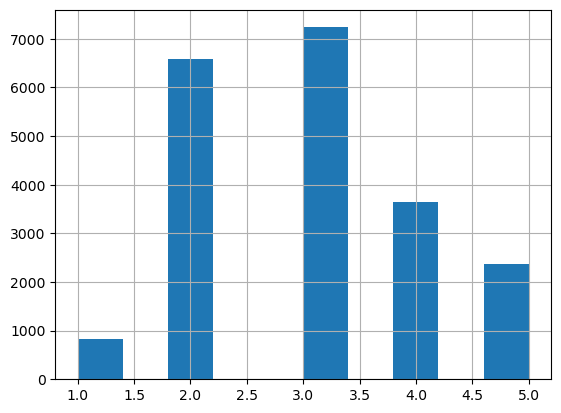

In [20]:
housing_data_copy['income_category'].hist()

<Axes: >

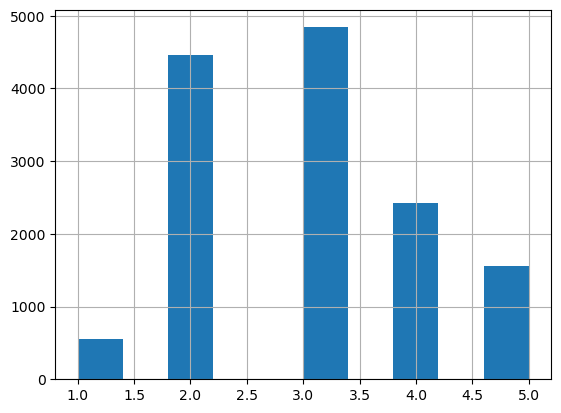

In [21]:
X_train['income_category'].hist()

<p>To make sure that training and original data set have same or similar distribution of values.<br> This will prevent any biases.</p>

###Stratified Split 

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [24]:
for train_index, test_index in split.split(housing_data_copy, housing_data_copy['income_category']):
    strat_train_set = housing_data_copy.loc[train_index]
    strat_test_set = housing_data_copy.loc[test_index]

In [25]:
strat_train_set['income_category'].value_counts()/ len(strat_train_set)

income_category
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [26]:
housing_data_copy['income_category'].value_counts()/ len(housing_data_copy)

income_category
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

<small>About The same value is there for the data set </small>

<line>Below is a code to see how much the training ataset and original dataset vary can be skipped 

In [27]:
def income_category_proportions(data):
    return data['income_category'].value_counts()/len(data)

In [28]:
train_set, test_set = train_test_split(housing_data_copy, test_size=0.2, random_state=42)
compare_props = pd.DataFrame({
    "Overall": income_category_proportions(housing_data_copy),
    "Stratified": income_category_proportions(strat_test_set),
    "Random": income_category_proportions(test_set),
    }).sort_index()
compare_props["Rand.%error"]= 100*compare_props["Random"] / compare_props["Overall"] -100
compare_props["Start.%error"]= 100*compare_props["Stratified"] / compare_props["Overall"] -100

In [29]:
compare_props

,Overall,Stratified,Random,Rand.%error,Start.%error
income_category,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


Back too the original flow 

In [30]:
strat_train_set.drop("income_category", axis="columns", inplace=True)
strat_test_set.drop("income_category", axis="columns", inplace=True)

<h2>Visualizing our Data </h2>

<small>Histograph</small>

In [31]:
housing = strat_train_set.copy()

In [32]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

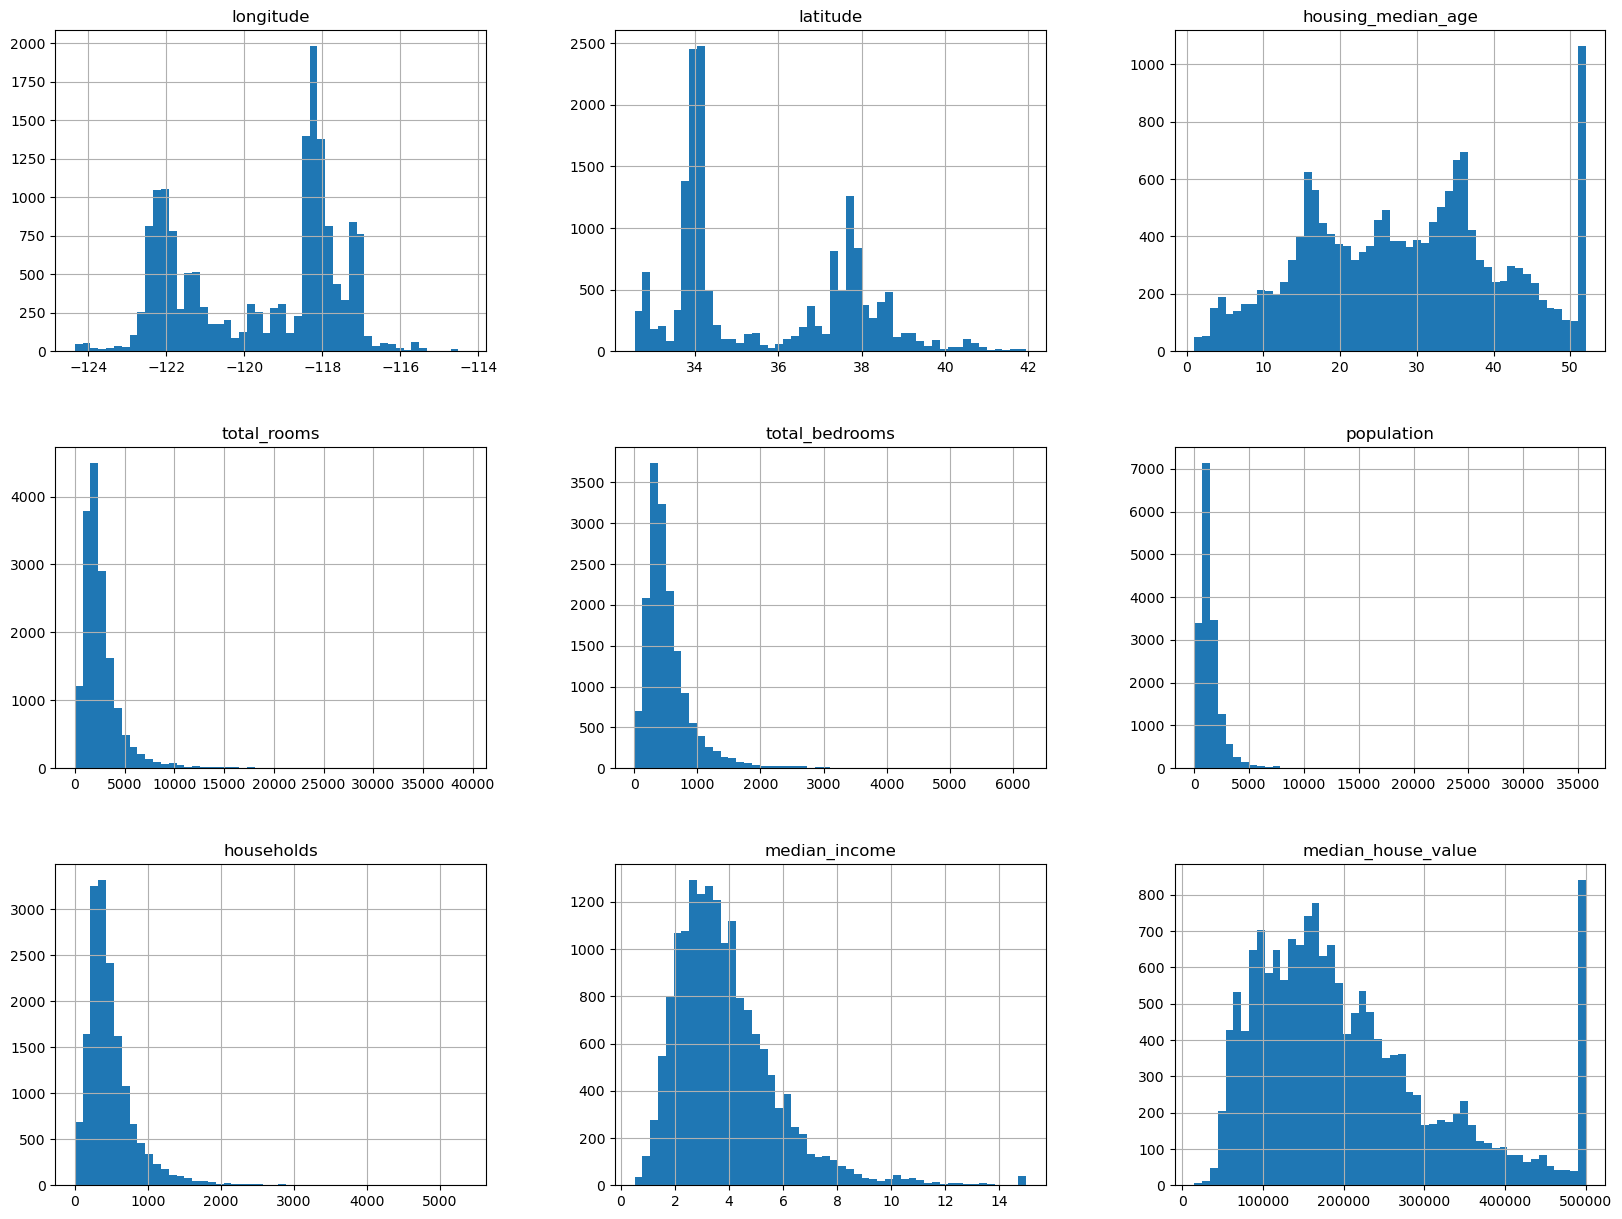

In [33]:
housing.hist(figsize=(20,15), bins=50)

<Axes: >

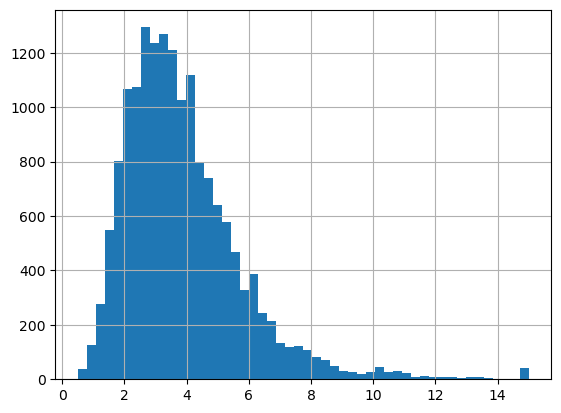

In [34]:
housing["median_income"].hist(bins=50)

In [35]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: xlabel='longitude', ylabel='latitude'>

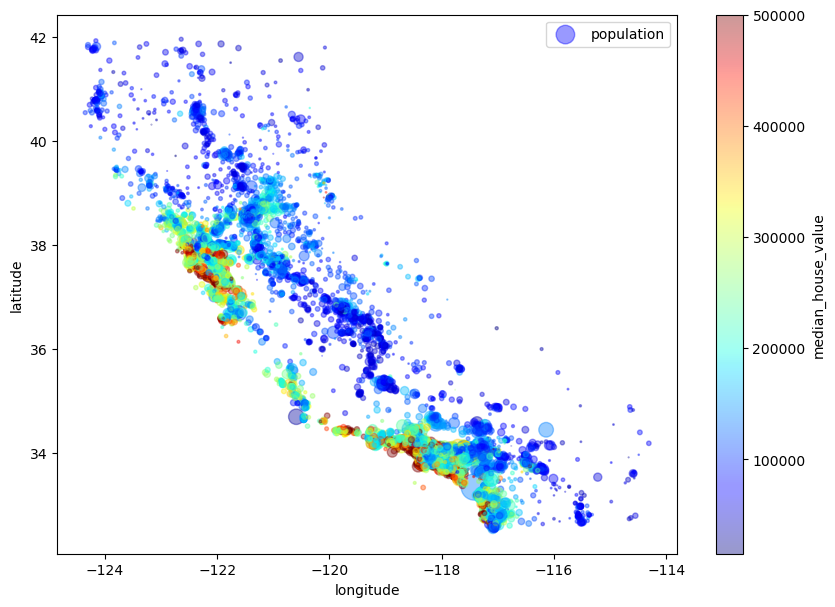

In [36]:
housing.plot(kind='scatter', x= "longitude", y= "latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c= "median_house_value", cmap=plt.get_cmap("jet"),
             colorbar= True, sharex=False)

# s here is size of the scatter = "population"
# C here is color of the scattter  = "median_house_value"


<h1>Correlation Matrices</h1>

In [37]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [38]:
corr = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']].corr()

<Axes: >

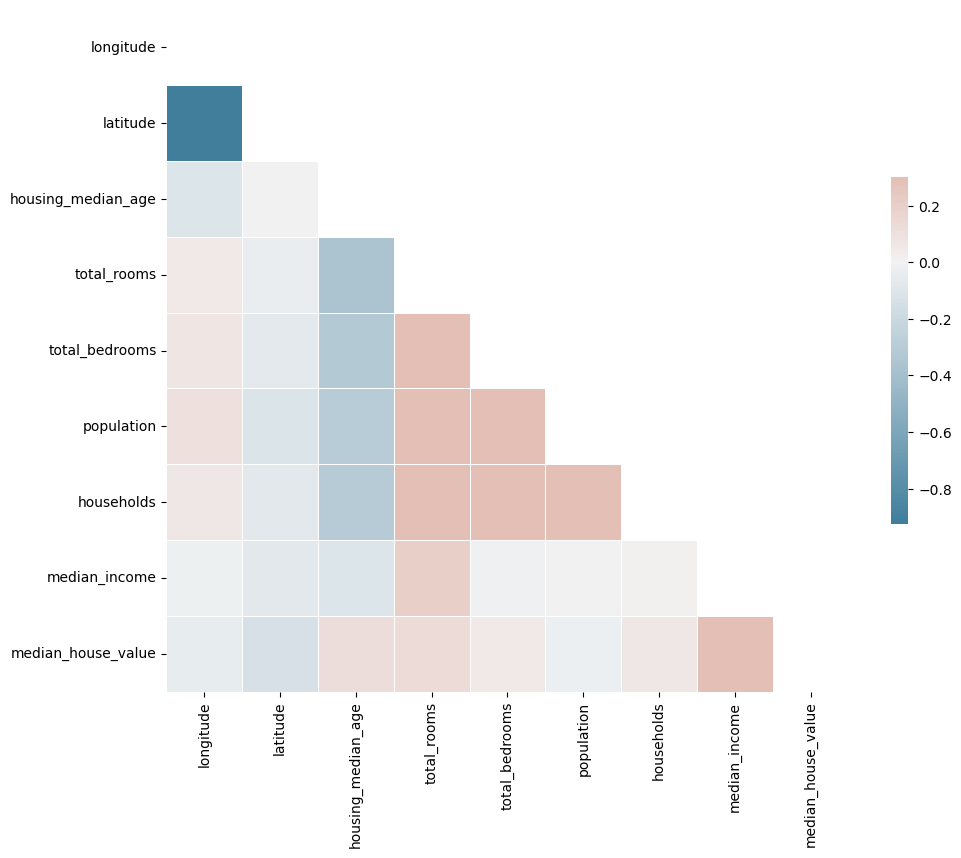

In [39]:
mask = np.triu(np.ones_like(corr,dtype=bool))

f, ax =plt.subplots(figsize=(11,9))
cmap =sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax= 0.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":0.5})


<h1>Preparing data for ML</h1>

In [40]:
housing_2 = housing.drop("median_house_value", axis = 1)
housing_labels= housing["median_house_value"].copy()

Dealing with missing values 

In [41]:
sample_incomplete_rows = housing_2[housing_2.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


1. drop the rows 
2. rid of columns 
3. imputation - insert a value rathe than dropping it 

In [42]:
#1 
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [43]:
#2
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [44]:
#3
median  = housing_2["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [45]:
imputer = SimpleImputer(strategy="median")
housing_num = housing_2.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


got rid of col 

In [46]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [47]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns= housing_num.columns, index=housing_num.index )
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [48]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [49]:
imputer.strategy

'median'

<h1>Encode Categorical Variables</h1>

In [50]:
housing_cat = housing_2[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [51]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [52]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

c:\Users\Admin\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

<h1>Feature Engineering </h1>
extra features added there<br>
Boosting algorithims can do it for you 

In [53]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]

    return data

In [54]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


<h1> Scaling our data</h1>
some values might be missunderstood as more important than others, eg - total rooms may be taken more important than the long n lat (these are +ve and -ve values where as rooms are all ve)<br> 
hence we scale our data
<p>
Many machine learning algorithms don't work well with unscaled data. For example, the magnitude of values in the "total rooms" feature is going to be substantially higher than that in the "median income" feature (because the median_income is scaled down by 1000). Because of this we usually will need to scale our values. There are multiple ways to accomplish this, and we will use the StandardScaler which will scale our values to their z-score within their column like so:

z = (x - u) / s

Where x is the value we're scaling, u is the mean of the column, and s is the standard deviation</p>

In [55]:
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_feature_engineered)

In [56]:
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.05896205,
         0.00622264,  0.01739526],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.02830837,
        -0.04081077,  0.56925554],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.1286475 ,
        -0.07537122, -0.01802432],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.26257303,
        -0.03743619, -0.5092404 ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.11548226,
        -0.05915604,  0.32814891],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.05505203,
         0.00657083,  0.01407228]])

<h1>Pipelines</h1>
Pipelines are a feature built into sklearn that allow us to easily apply a number of transformations one after another. There is a little bit of complexity associated with them that leads me to exclude them in this chapter. We will most likely go over them in another chapter.
<br>
Instead we'll just create our own version of a pipeline using a normal Python function.

In [ ]:
def data_transformations(data):

    ### Separate Labels if they Exist ###

    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
        
    else:
        labels = None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # We're encoding this variable, so we don't need it in our list anymore


    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    ### Concatening all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features